In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import pytorch_lightning as pl
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import TensorBoardLogger
import os
import sys
from sklearn.preprocessing import StandardScaler
root = "/project/wyin/jlee/ml-project/inverse-problem"
util_loc = os.path.join(root, "utils")
data_loc = os.path.join(root, "data")
sys.path.append(util_loc)
from utilities import InverseNeuralNet, InverseDataModule, ScaledData, see_results

In [5]:
batch_size = 1000
learning_rate = 0.001
lr_factor = 0.5

dos_data = InverseDataModule(data_loc, batch_size)
layer_sizes = [301, 16, 16, 3]
logger = TensorBoardLogger('logs/', name = f'{layer_sizes},{learning_rate},{batch_size}, ')


trainer = pl.Trainer(max_time="00:00:00:20", logger = logger)
model = InverseNeuralNet(layer_sizes, lr = learning_rate, lr_factor = lr_factor)
trainer.fit(model, datamodule=dos_data)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name         | Type       | Params
--------------------------------------------
0 | forward_prop | Sequential | 5.2 K 
--------------------------------------------
5.2 K     Trainable params
0         Non-trainable params
5.2 K     Total params
0.021     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/home/wyin/.conda/envs/ML-env/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:240: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 40 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/home/wyin/.conda/envs/ML-env/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:240: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 40 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Time limit reached. Elapsed time is 0:00:20. Signaling Trainer to stop.


Validation: 0it [00:00, ?it/s]

In [6]:
all_data = ScaledData(data_loc)
val_dos = all_data.val_dos
val_params = all_data.val_params

In [7]:
val_dos_tensor = torch.from_numpy(val_dos).float()
predicted = model(val_dos_tensor).detach().numpy()

model mse: 0.0011020509713886946


IndexError: index 11 is out of bounds for axis 0 with size 11

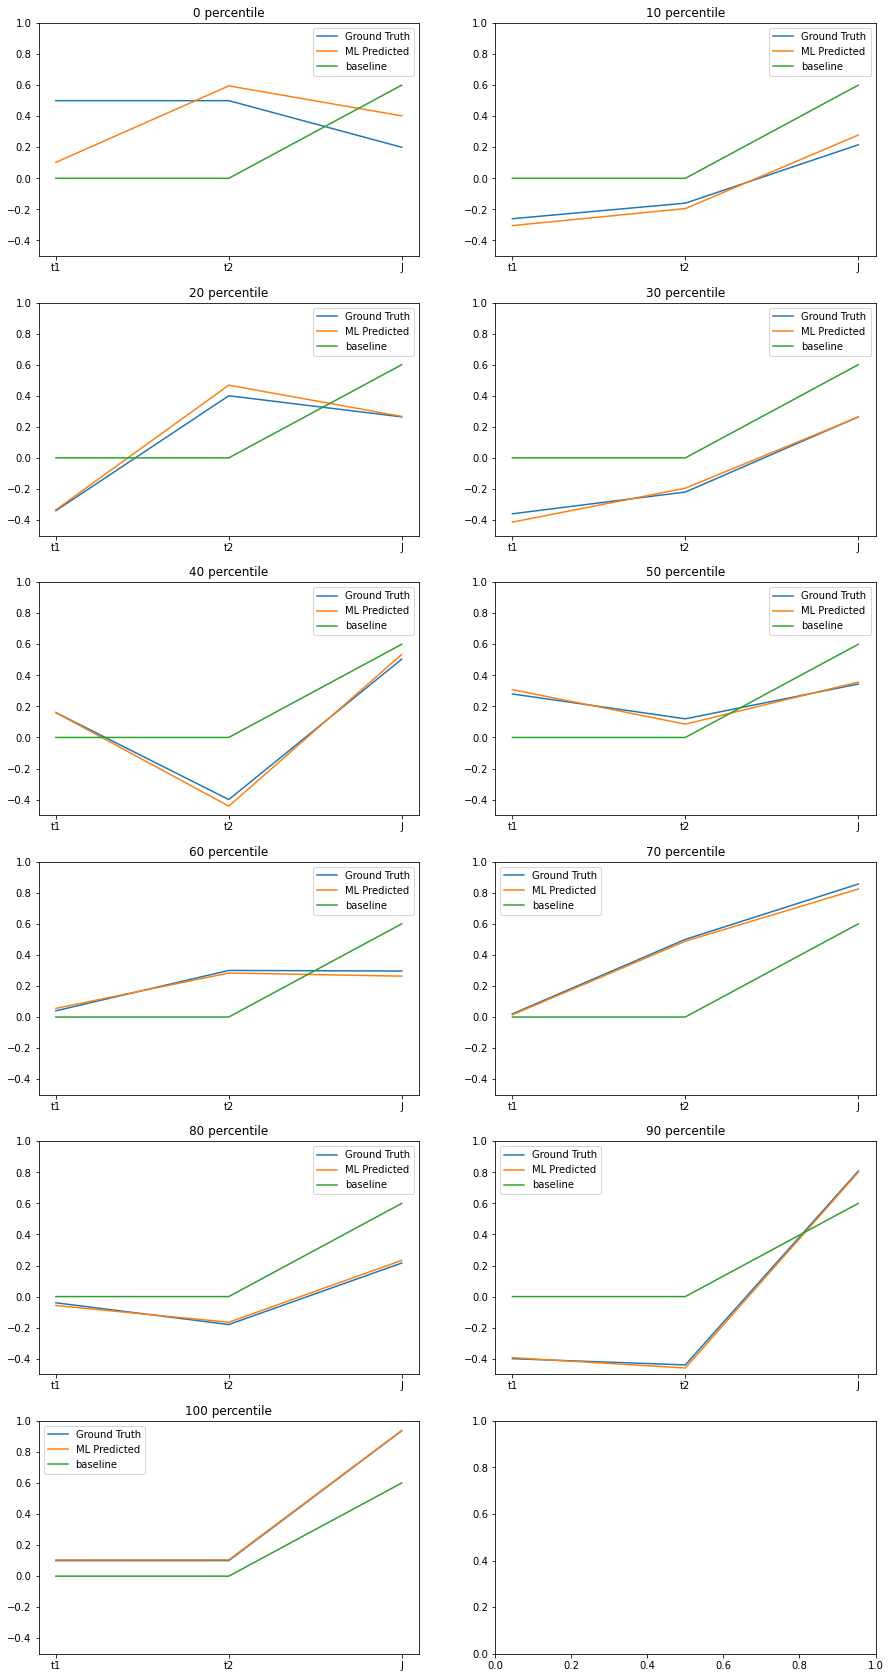

In [12]:
see_results(predicted, val_params, (6, 2), np.arange(0, 110, 10), True)